In [23]:
import sys
sys.path.append("../..") 

In [24]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [25]:
# args
RES_PATH = "../../experiments/mimic3/model_results_19112021/"

In [26]:
def get_metrics_from_folder(path):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathc = os.path.join(path, folder, "checkpoints/")
            # model name:
            for _, _, files in os.walk(pathc):
                file = [f for f in files if f.endswith('.ckpt')][0]
                chk_path = os.path.join(pathc,file)
            checkpoint = torch.load(chk_path)
            model_name = checkpoint["hyper_parameters"]['net']
            # model results:
            df = pd.read_csv(pathm)
            df_test = df.loc[:,df.columns.str.startswith('test') | df.columns.str.startswith('int')]
            df_test = df_test.dropna()
            df_test.loc[:,'model'] = model_name
            df_tests.append(df_test)
        df_test = pd.concat(df_tests, axis=0)
    return df_test

In [27]:
df_test = get_metrics_from_folder(RES_PATH)

In [28]:
df_test.sort_values('model')

,test_loss,test_loss_pred,test_loss_update,test_rmse,test_var_pit,test_crps,test_ignorance,test_int_score,int_coverage,int_med_width,int_av_width,model
499,-0.207939,-0.144410,-0.739260,38.118946,0.072748,0.124445,0.080881,1.234137,0.948134,116.224213,141.247406,IMODE
774,-0.195681,-0.129390,-0.760751,39.055531,0.073881,0.126701,0.063099,1.259710,0.946282,116.672653,141.031296,IMODE
692,-0.074615,-0.010402,-0.679436,38.846310,0.073231,0.125142,-0.053811,1.222554,0.948591,117.999443,143.071701,IMODE
765,-0.119018,-0.091380,-0.335885,39.440914,0.074547,0.127629,0.063742,1.257927,0.945313,113.109344,144.626144,ODEGRUBayes
896,-0.104125,-0.075926,-0.334060,39.721977,0.074695,0.129123,0.047726,1.291595,0.943478,112.446449,141.209122,ODEGRUBayes
366,-0.112941,-0.087341,-0.312466,38.888706,0.073128,0.127158,0.061742,1.261964,0.947080,113.821083,142.709763,ODEGRUBayes
357,-0.141840,-0.096088,-0.528436,39.582951,0.073404,0.128898,0.050336,1.280583,0.947009,116.367989,146.148438,ctGRUModel
468,-0.158354,-0.114506,-0.517657,38.542297,0.071550,0.126324,0.070658,1.247663,0.950654,116.501884,147.204987,ctGRUModel
1020,-0.165962,-0.115930,-0.583299,39.418262,0.072355,0.127441,0.065898,1.248208,0.950699,116.795090,149.375076,ctGRUModel
1020,-0.217000,-0.140113,-0.877369,39.035870,0.074301,0.126537,0.063226,1.257745,0.945659,115.133163,168.134903,ctLSTMModel


In [32]:
headline_metrics = ['test_rmse','test_crps','test_int_score','int_coverage','int_med_width','int_av_width','test_ignorance']
df_test.loc[:,headline_metrics + ["model"]].groupby(["model"]).agg(["mean","std"])

test_rmse           test_crps           test_int_score  \
                         mean       std      mean       std           mean   
model                                                                        
IMODE               38.673595  0.491600  0.125429  0.001155       1.238800   
ODEGRUBayes         39.350533  0.423924  0.127970  0.001026       1.270495   
ctGRUModel          39.181170  0.559374  0.127554  0.001291       1.258818   
ctLSTMModel         38.703448  0.604814  0.125352  0.001338       1.234753   
ctRNNModel          40.114085  0.561303  0.129427  0.001394       1.291191   
dtGRUModel          39.645505  0.489082  0.128392  0.001161       1.264759   
dtLSTMModel         39.045860  0.469495  0.126849  0.001060       1.248280   
dtRNNModel          41.584581  0.575489  0.131878  0.001352       1.317176   
neuralJumpModel     39.955706  0.426849  0.131241  0.001308       1.353144   
resNeuralJumpModel  39.567375  0.297162  0.126644  0.001289       1.244975   

                             int_coverage           int_med_width            \
                         std         mean       std          mean       std   
model                                                                         
IMODE               0.019012     0.947669  0.001223    116.965436  0.923121   
ODEGRUBayes         0.018384     0.945290  0.001801    113.125626  0.687462   
ctGRUModel          0.018851     0.949454  0.002118    116.554988  0.218446   
ctLSTMModel         0.020120     0.946702  0.000903    115.399134  1.179823   
ctRNNModel          0.031784     0.942999  0.004508    115.547170  1.664499   
dtGRUModel          0.018953     0.950549  0.001620    117.317960  0.618200   
dtLSTMModel         0.017477     0.952525  0.001676    117.492823  0.653145   
dtRNNModel          0.028075     0.943937  0.001912    118.056707  1.784931   
neuralJumpModel     0.027926     0.939759  0.003601    122.738057  0.784576   
resNeuralJumpModel  0.021328     0.945788  0.000641    115.000781  1.509935   

                   int_av_width            test_ignorance            
                           mean        std           mean       std  
model                                                                
IMODE                141.783468   1.120863       0.030056  0.073174  
ODEGRUBayes          142.848343   1.712721       0.057737  0.008727  
ctGRUModel           147.576167   1.645032       0.062298  0.010629  
ctLSTMModel          167.811086  27.776875       0.075623  0.011986  
ctRNNModel           138.377680   2.529137       0.042563  0.014979  
dtGRUModel           145.511200   1.346621       0.055677  0.010090  
dtLSTMModel          147.039093   1.132199       0.069899  0.009991  
dtRNNModel           140.524785   1.453154       0.016758  0.015804  
neuralJumpModel      140.857824   3.101103       0.004393  0.013372  
resNeuralJumpModel   139.738118   0.655521       0.071646  0.013717

In [30]:
df_test_long = pd.melt(df_test, "model", var_name="measurement")

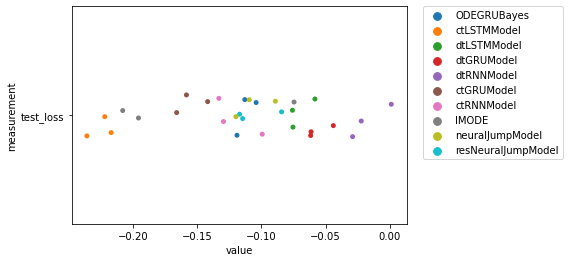

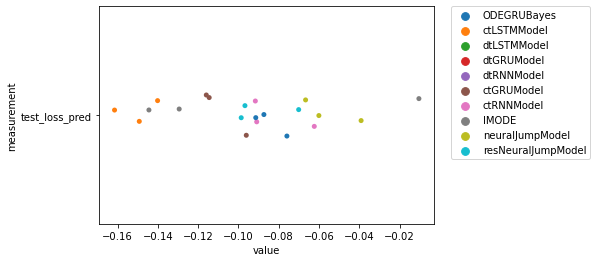

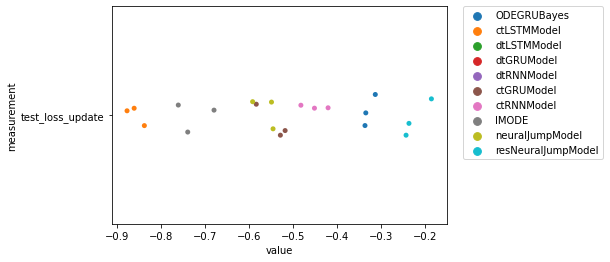

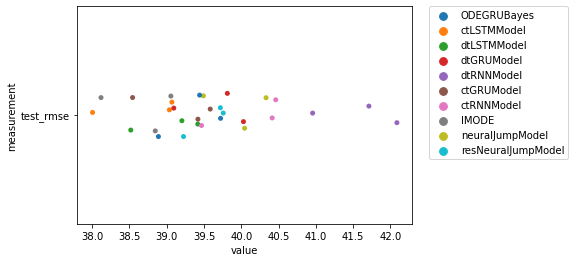

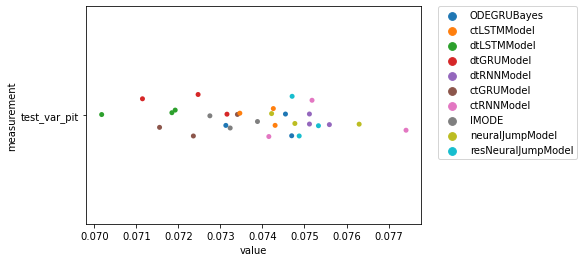

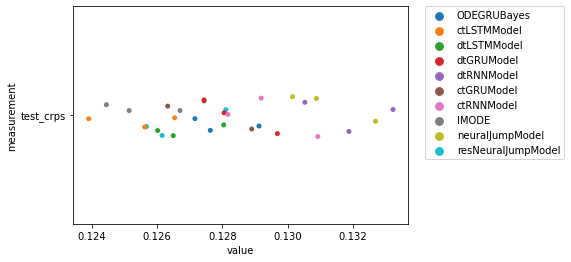

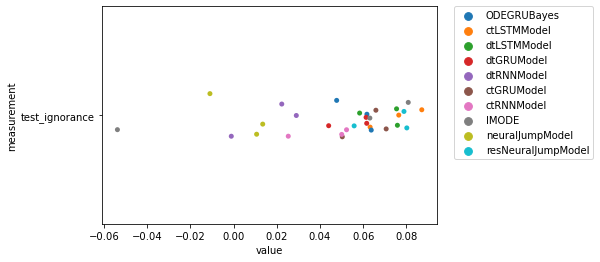

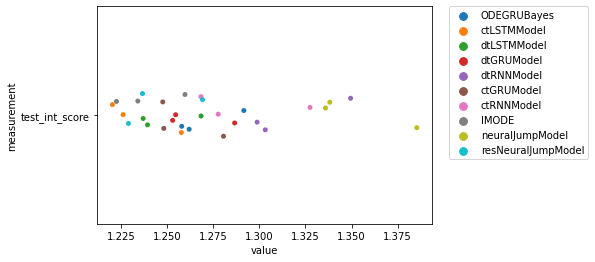

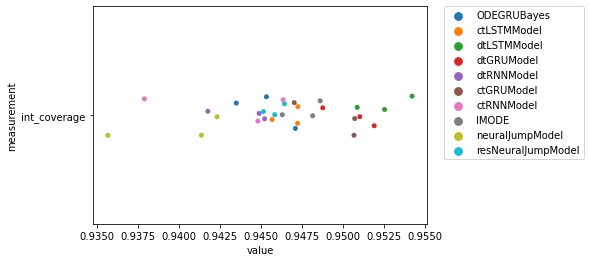

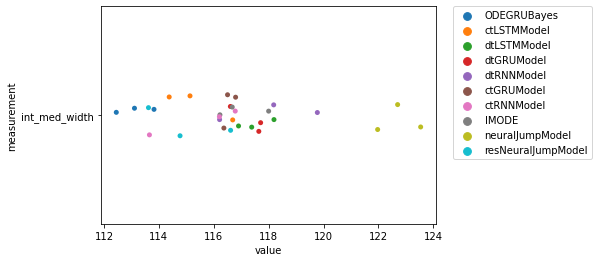

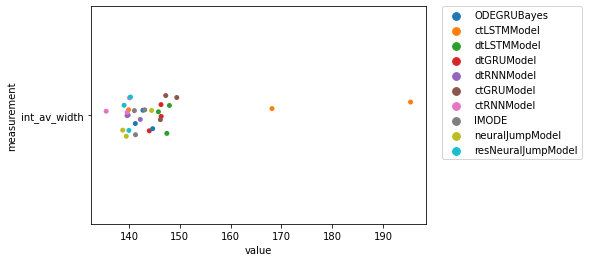

In [31]:
# Initialize the figure
for measure in list(df_test_long.measurement.unique()):
    f, ax = plt.subplots()
    sns.stripplot(x="value", y="measurement", hue="model",
                  data=df_test_long.loc[df_test_long.measurement.isin([measure])])
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(loc="lower")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()